# Exploratory Data Analysis on YouTube Top Trending Videos

As a new video blogger and content creater with my girlfriend on Youube, I was interested in making an exploratory data analysis (EDA) on YouTube's top trending videos.

For this report...
This contains a dataset from Kaggle on trending YouTube videos between 2017-2018. The link to the data is available from here: https://www.kaggle.com/datasnaek/youtube-new


## Summary of the Dataset
YouTube maintains a list of its top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. The data included for are from the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day. 

## Import Libraries
The first step of the process includes importing various libraries that will be used for the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import wordcloud
import datetime

## Read in Data
I will be primarily focusing on the US data set and will retrieve a basic description of the data.

In [2]:
yt_df = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/USvideos.csv')

yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
yt_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


This presents a basic idea of the data and its columns, and a summary of some of its continuous variables.

## Scatter Plots
Scatter plots helps with illustrating a visualiztion of the views, likes and dislikes. Its purpose is to highlight any sort of correlation in the dataset.

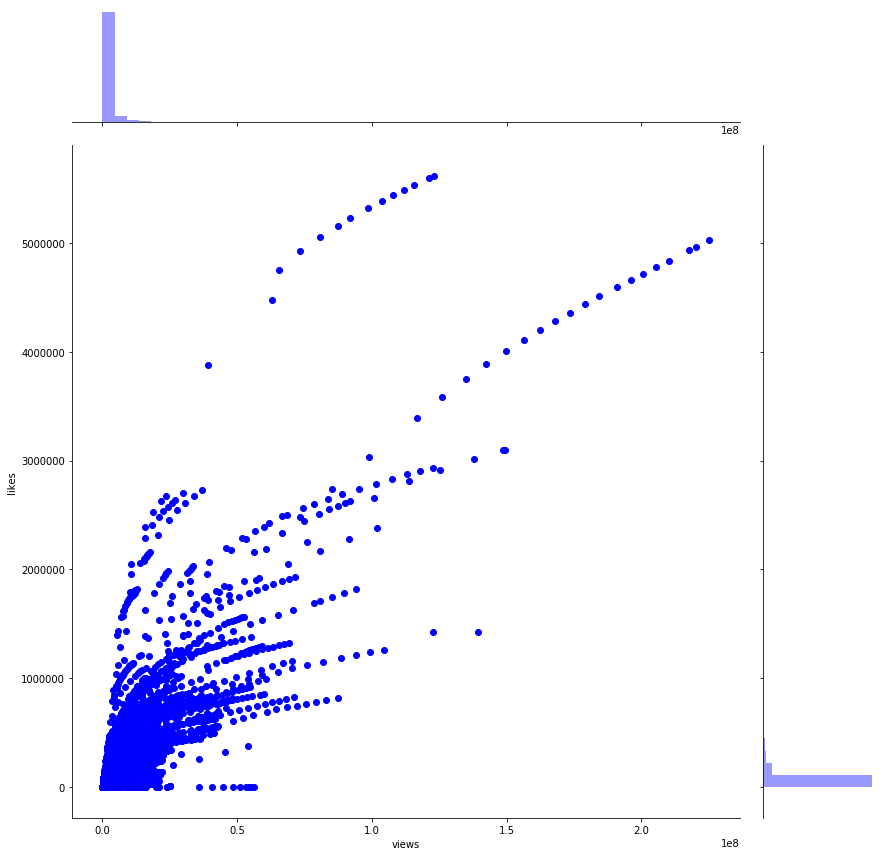

In [4]:
sns.jointplot(x='views',y='likes',data=yt_df,color='blue', height=12)

This first scatter plot is .... Its variables includes likes and views. The jointplot allows us to see the distribution and analyze that most trending views and likes are towards the lower range with huge outliers. It loosely follows a $likes$ = $\sqrt{views}$

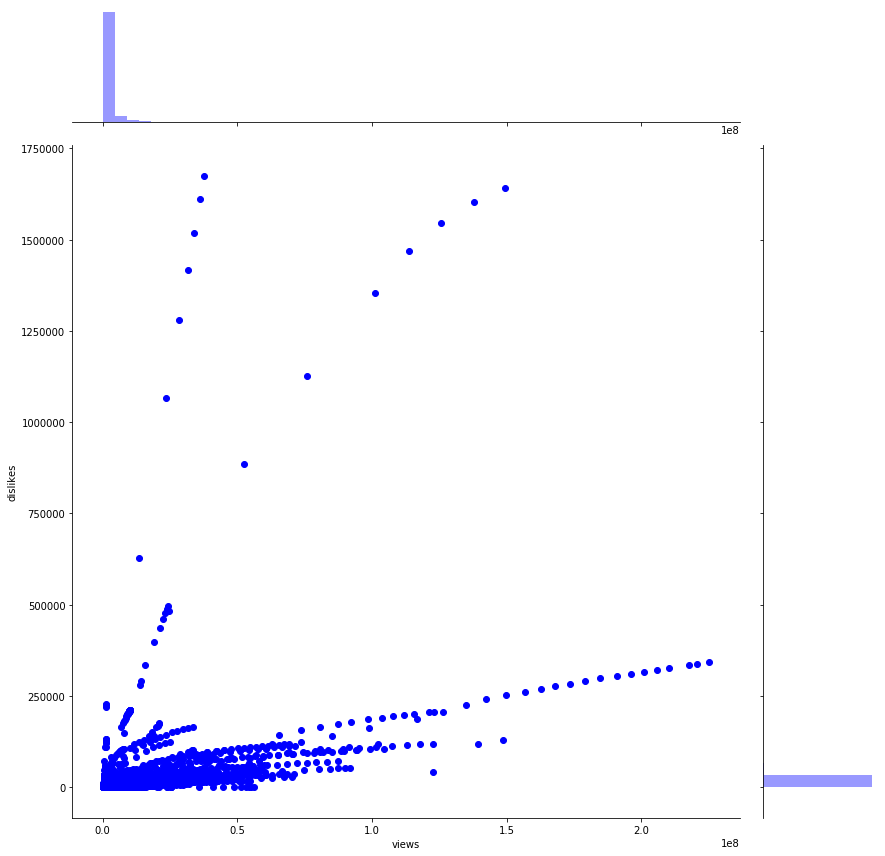

In [5]:
sns.jointplot(x='views',y='dislikes',data=yt_df,color='blue',height=12)

This scatterplot represents the relationship between dislikes and views. Their relationship is not as distinct as with likes and views, but there is still a correlation that a video with more views will most likely have more dislikes than a video with less views.

## Correlation and Heatmap
A correlation data frame is created from quantifiable variables. With the correlation data, we will create a heatmap to help better visualize the relationship with the different variables.

In [6]:
correlation = ['views', 'likes', 'dislikes', 'comment_count'] #create a correlation matrix of the discrete variabs

In [7]:
corr_data = yt_df[correlation].corr() 
display(corr_data)

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


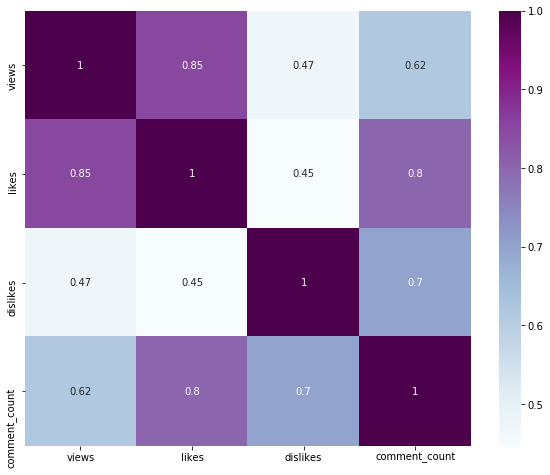

In [8]:
plt.figure(figsize = (10,8))

sns.heatmap(corr_data, cmap='BuPu', annot=True)

This heatmap indicates that there is strong correlation between views and likes more than any other variable. The next strong correlations include comment_counts with likes and dislikes, which is even more of a correlation than comment_counts and views! A viewer who interacts with the video and comments has a higher chance of liking or dislikeing the view.

## Count of Most Popular Categories
Now we will take a look and analyze the most popular video categories. To begin, the column named category_id needs to be changes to the names from the accompanying JSON file.

In [9]:
#using a with and for loop to load in the categories names for the category_id column

with open("C:/Users/blong/Desktop/Python/youtube-new/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_nm = {}
for cat in categories:
    cat_nm[int(cat["id"])] = cat["snippet"]["title"]
yt_df['category_name'] = yt_df['category_id'].map(cat_nm)

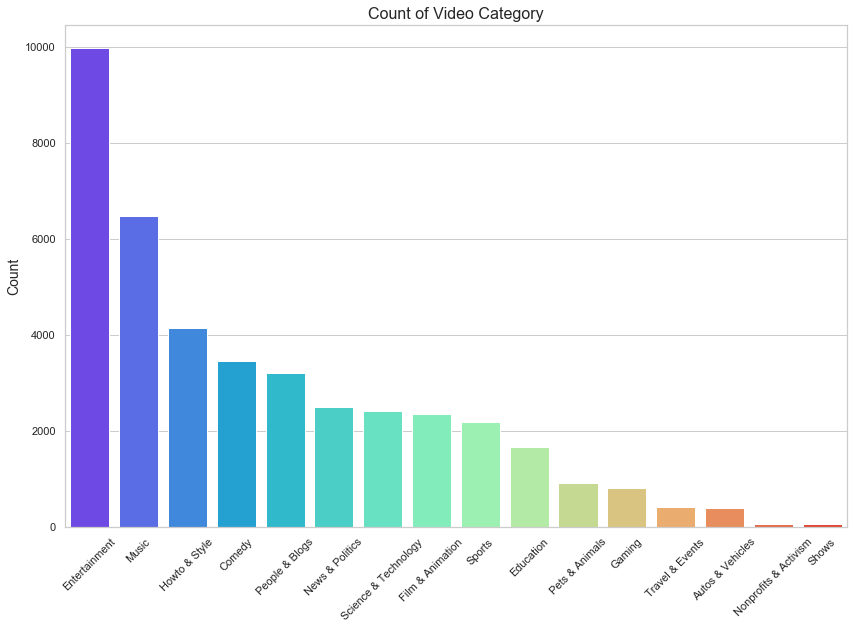

In [10]:
plt.figure(figsize = (14,9))

sns.set(style='whitegrid')
g = sns.countplot('category_name',order=yt_df['category_name'].value_counts().index, data=yt_df, palette="rainbow")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Count of Video Category", fontsize=16)
g.set_xlabel("", fontsize=14)
g.set_ylabel("Count", fontsize=14)
plt.subplots_adjust(hspace = 0.9, top = 0.9)


According to this bar graph, the top three trending video categories are Entertainment, Music, and How t" & Style. The least popular categories are Shows, Nonprofits & Activism and Autos & Vehicles.

## Title Length (by Characters) and Views
Next, we'll be analyzing the trend of title lengths. In order to do so, create a new column named title_length.

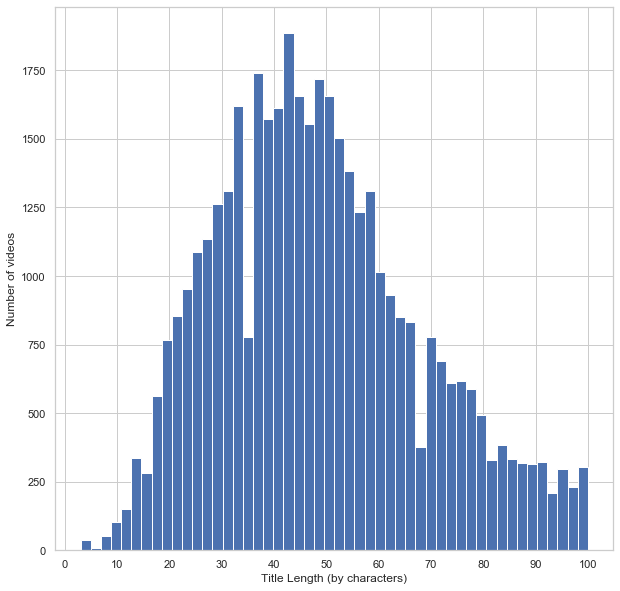

In [11]:
yt_df["title_length"] = yt_df["title"].apply(lambda x: len(x)) #using apply function to find length of each title

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,10))
g3 = sns.distplot(yt_df["title_length"], kde=False, rug=False, 
                 hist_kws={'alpha': 1}, ax=ax)
g3 = ax.set(xlabel="Title Length (by characters)", ylabel="Number of videos", xticks=range(0, 110, 10))

According to the histogram, the most common title lengths are around 30-55 characters.

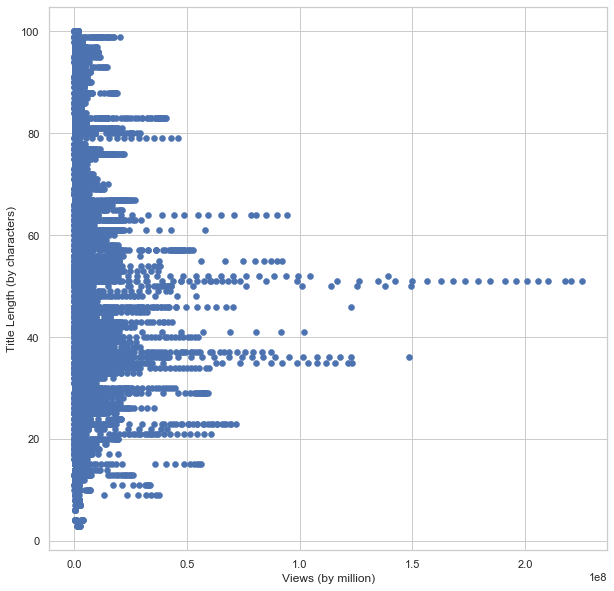

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
g4 = ax.scatter(x=yt_df['views'], y=yt_df['title_length'], linewidths=0.5)
g4 = ax.set(xlabel="Views (by million)", ylabel="Title Length (by characters)")

The most viewed videos have title lengths from around 35-65 characters. Interestingly enough, the most viewed videos all have 50 characters for the title length.

## New Rates Variables
I created new variables to check the engagement rates.

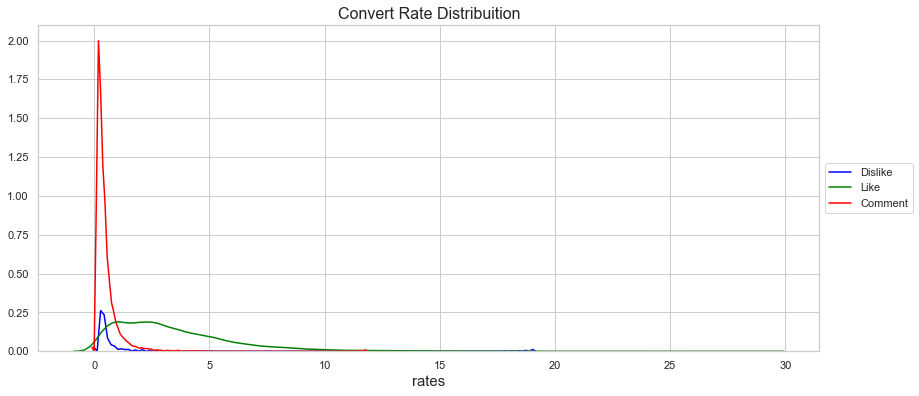

In [13]:
#create new columns to find by dividing the other discrete variables by the views
yt_df['like_rate'] =  yt_df['likes'] / yt_df['views'] *100  
yt_df['dislike_rate'] =  yt_df['dislikes'] / yt_df['views'] *100
yt_df['comment_rate'] =  yt_df['comment_count'] / yt_df['views'] *100

plt.figure(figsize = (14,6))

g1 = sns.distplot(yt_df['dislike_rate'], color='blue',hist=False, label="Dislike")
g1 = sns.distplot(yt_df['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(yt_df['comment_rate'],color='red' ,hist=False,label="Comment")
g1.set_title('Convert Rate Distribuition', fontsize=16)
plt.xlabel('rates', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

It's extremely intriguing to see the difference in each distribution rate. For instance, likes have the highest rate and comments have the largest engagement.

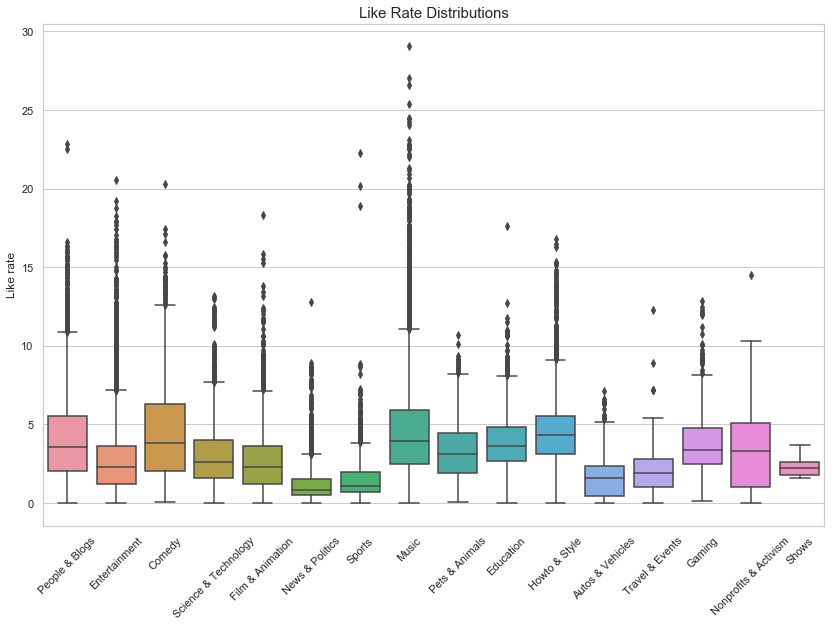

In [14]:
plt.figure(figsize = (14,9))

g= sns.boxplot(x='category_name',y='like_rate',  data=yt_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Like Rate Distributions", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)
plt.subplots_adjust(hspace = 0.9, top = 0.9)

This "Like Rate Distribution" graph illustrate each category by like rate. It indicates that music is the top most liked category.

## New Heatmap
For this new heatmap, I inputted four new variables: like_rate, dislike_rate, comment_rate, title_length. This will demonstrate if there is any difference in the correlation or if it will alter old correlations.

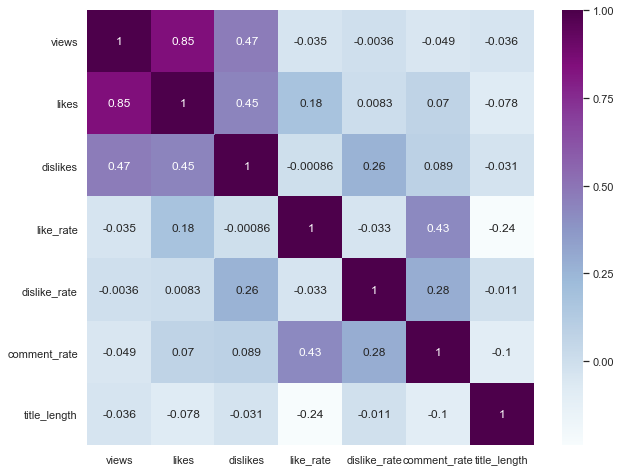

In [15]:
#new df with the newly added discrete variables
new_corr_df = yt_df[['views','likes','dislikes', "category_name"
                     ,'like_rate', 'dislike_rate', 'comment_rate','title_length',]].corr()

plt.figure(figsize = (10,8))

sns.heatmap(new_corr_df,cmap='BuPu' ,annot=True)
plt.show()

According to this heatmap, likes still correlates the most to views. Rates and title lengths do not seem to have much of a correlation, but there is small relationship between the like and comment rate.

## World Cloud
Word Clouds allows us to see the most common words in each title based on the font-size of the word. This is a fun way of analyzing the most common words. According to this word cloud, the most common words include Official, Video, New, Trailer, and Makeup.


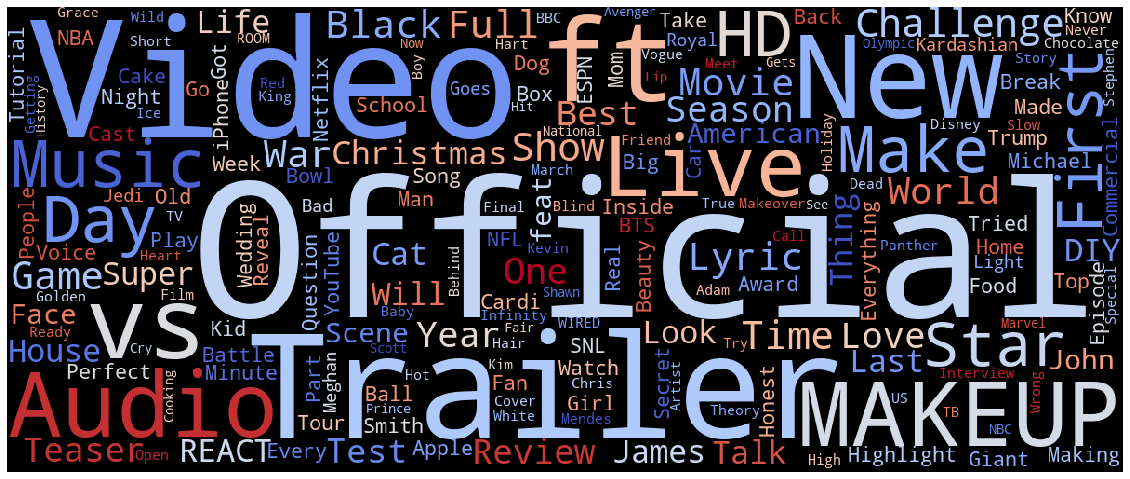

In [16]:
tle_wrd = list(yt_df["title"].apply(lambda x: x.split()))  #apply function to spilt up each word in title
tle_wrd = [x for y in tle_wrd for x in y]


wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="Black", 
                         colormap="coolwarm").generate(" ".join(tle_wrd))
plt.figure(figsize=(20,15))
plt.imshow(wc)
ax = plt.axis("off")

## Most Popular Channels

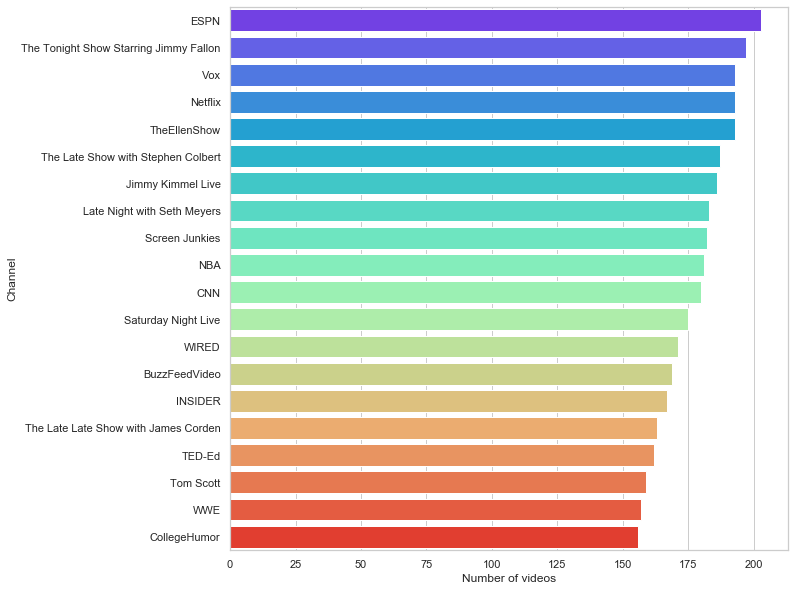

In [17]:
cdf = yt_df.groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20) #groupby channel titles size

fig, ax = plt.subplots(figsize=(10,10))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette='rainbow', ax=ax)
_ = ax.set(xlabel="Number of videos", ylabel="Channel")

According to this bar graph, the most popular channels are ESPN, The Tonight Show Starring Jimmy Fallon, Vox, and Netflix. This graph also indicates that the most popular channels are already established brands that was outside of YouTube. It also points out the some of the most trending video categories being Entertainment, Sports, News, and Comedy.

# Time and Day of Week

The publish_time column in the dataset is from 2017-11-12T18:01:41.000Z. The information according to this website, https://www.w3.org/TR/NOTE-datetime, the date of publishing the video is 2017-11-12 and the time is 18:01:41 in Coordinated Universal Time (UTC) time zone.


In [18]:
yt_df["publish_day"] = yt_df["publish_time"].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a')) #use the datetime extract the day

yt_df["publish_hour"] = yt_df["publish_time"].apply(lambda x: x[11:13]) #extract the week

yt_df.drop(labels='publish_time', axis=1, inplace=True)

## Day of Week Counts

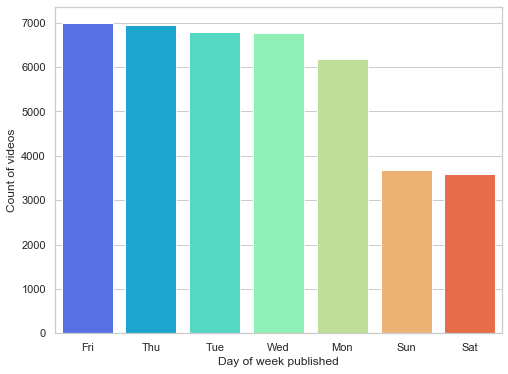

In [19]:
count_day_df = yt_df["publish_day"].value_counts().to_frame().reset_index().rename(columns={"index": "publish_day", "publish_day": "No_of_videos"})

fig, ax = plt.subplots(figsize=(8,6))
g5 = sns.barplot(x="publish_day", y="No_of_videos", data=count_day_df, palette='rainbow', ax=ax)
g5 = ax.set(xlabel="Day of week published", ylabel="Count of videos")

The most popular days include Thursday and Friday, which is the end of the work week. The least popular days are the weekend, which makes sense because most people enjoy going out during the weekends rather than the weekdays.

## Hour of Day Counts

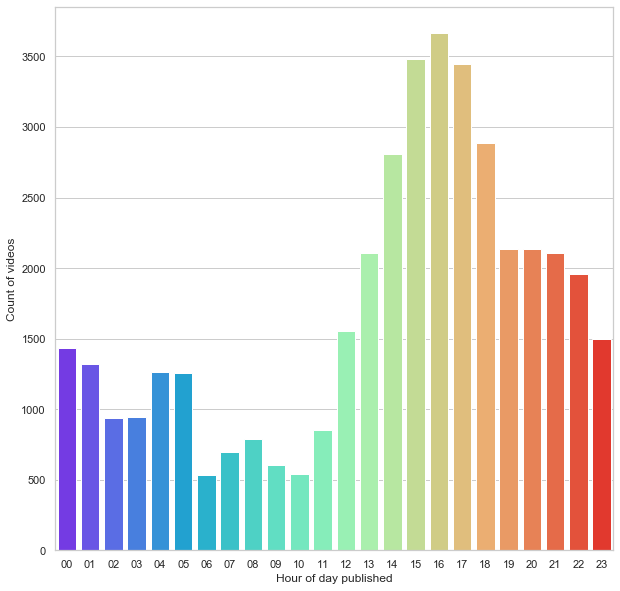

In [20]:
count_hour_df = yt_df["publish_hour"].value_counts().to_frame().reset_index().rename(columns={"index": "publish_hour", "publish_hour": "No_of_videos"})

fig, ax = plt.subplots(figsize=(10,10))

g6 = sns.barplot(x="publish_hour", y="No_of_videos", data=count_hour_df, palette='rainbow', ax=ax)
g6 = ax.set(xlabel="Hour of day published", ylabel="Count of videos")

The most popular time of day seems to be between 2PM to 6PM, which around the time people get off from work.

## Comparing Other Countires
After exploring US video trends, we will now dig deep and analyze all other countries such as UK, Canada, etc.

In [21]:
col_list = [ 'views', 'likes', 'dislikes', 'comment_count'] #create a colunn list to help load in data faster other data points not needed.

us = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/USvideos.csv', usecols=col_list) #USA
ca = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/CAvideos.csv', usecols=col_list) #Canada
de = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/DEvideos.csv', usecols=col_list) #Germany
fr = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/FRvideos.csv', usecols=col_list) #France
gb = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/GBvideos.csv', usecols=col_list) #United Kingdom 
ind = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/INvideos.csv', usecols=col_list) #India
jp = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/JPvideos.csv', usecols=col_list) #Japan
kr = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/KRvideos.csv', usecols=col_list) #South Korea
mx = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/MXvideos.csv', usecols=col_list) #Mexico
ru = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/RUvideos.csv', usecols=col_list) #Russia

## Scatterplot of Each Country by Likes and Views

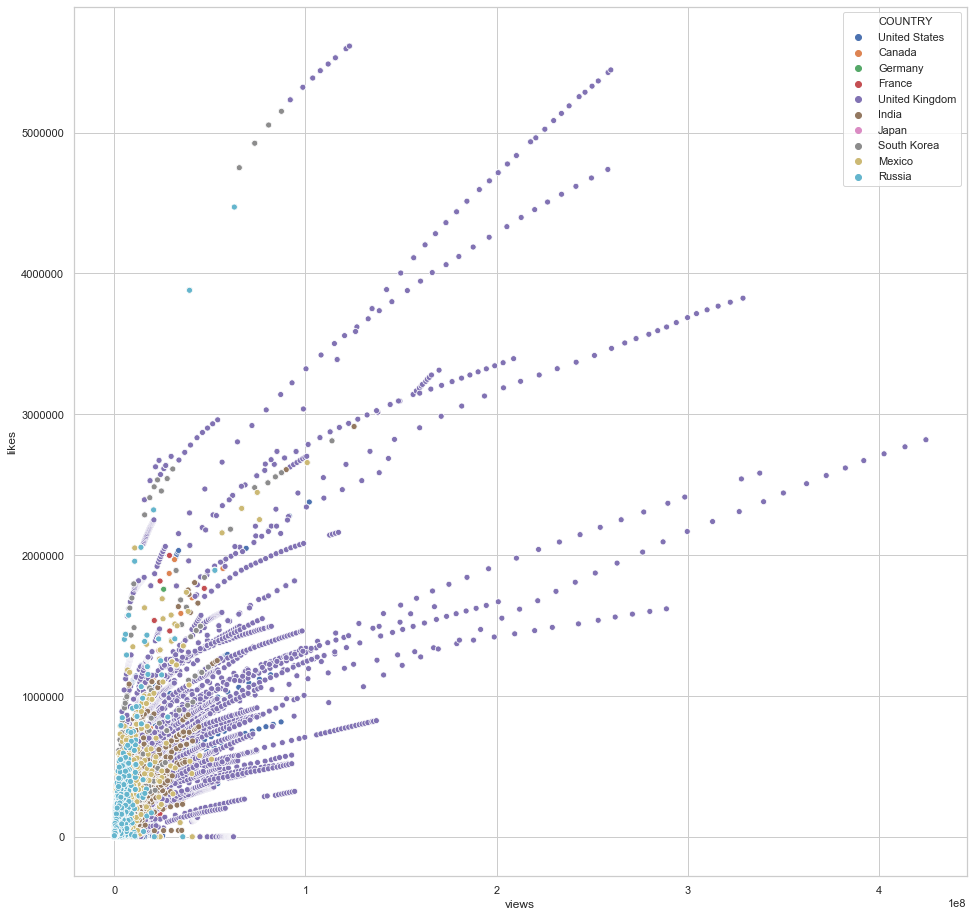

In [22]:
yt_df_list = [us, ca, de, fr, gb, ind, jp, kr, mx, ru]
yt_df_name_list = ['United States', 'Canada', 'Germany', 'France', 'United Kingdom', 'India','Japan', 'South Korea', 'Mexico', 'Russia']

All_yt_df = pd.DataFrame(columns=['views', 'likes', 'COUNTRY'])

#Use for loop for each country
for i in range (len(yt_df_list)):
    combine = np.full((len(yt_df_list[i])),yt_df_name_list[i])
    yt_df_list[i]['COUNTRY'] = combine
    All_yt_df = pd.merge(All_yt_df,yt_df_list[i], how='outer')
    
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=All_yt_df["views"], y=All_yt_df["likes"], hue=All_yt_df["COUNTRY"])
    

The trend is similar for the USA as it is for most countries. One hypothesis for this is the less viewed videos are watched by subscribers or binge watchers, who have generally like and comment. More viewed videos are shown to people less active on YouTube, who have a lower tendency to give a like. In theory the like/view ratio will mostly likely fall as the views on the videos increase.

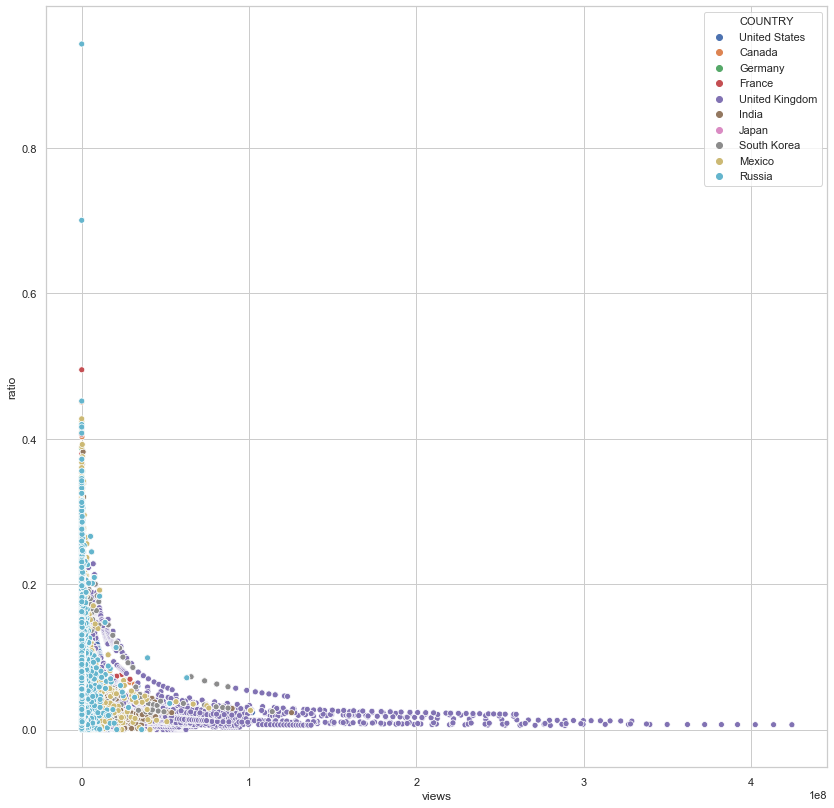

In [23]:
views = All_yt_df["views"]
likes = All_yt_df["likes"]
ratio = likes/views
All_yt_df["ratio"] = ratio
matplotlib.pyplot.figure(figsize=(14,14))
sns.scatterplot(x=All_yt_df["views"], y=All_yt_df["ratio"], hue=All_yt_df["COUNTRY"])

The above hypothesis seems to stand correct due to the fact that the ratio of likes is much higher on lower viewed videos.

Thanks for reading through my EDA on top trending YouTube videos. I hope you found it interesting. Contact me through my website for any questions or ideas on any other datasets you would like me to research and analyze!